<a href="https://colab.research.google.com/github/Rwalam/ML2023-WesleyFreire/blob/main/at4ArvoreDeDecis%C3%A3oTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML2023-1/at4titanicTree/titanic.csv')

In [3]:
df = df.drop(["Name", "Ticket", "Cabin", "Embarked", "PassengerId"], axis=1)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

In [4]:
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 0.75


[Text(0.4680710883989726, 0.9791666666666666, 'Sex <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Não sobreviveu'),
 Text(0.1722295055650685, 0.9375, 'Age <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]\nclass = Não sobreviveu'),
 Text(0.046232876712328765, 0.8958333333333334, 'SibSp <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7, 15]\nclass = Sobreviveu'),
 Text(0.039383561643835614, 0.8541666666666666, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Sobreviveu'),
 Text(0.053082191780821915, 0.8541666666666666, 'Parch <= 1.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Não sobreviveu'),
 Text(0.046232876712328765, 0.8125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Não sobreviveu'),
 Text(0.059931506849315065, 0.8125, 'SibSp <= 4.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Não sobreviveu'),
 Text(0.053082191780821915, 0.7708333333333334, 'Fare <= 31.331\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Não sobreviveu'),
 Text(0.04623

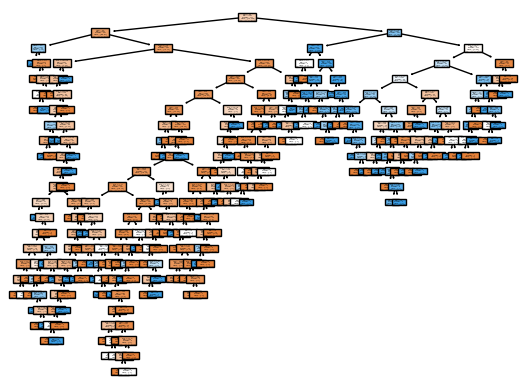

In [6]:
plot_tree(tree, feature_names=X.columns, class_names=["Não sobreviveu", "Sobreviveu"], filled=True)